In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

TO DO LIST

- veriyi oku (YAPILDI)
- verinin sütunlarını incele
- null değerlerden kurtul
- dtype ı object olanları one hot encode yaparak normal hale getir
- sütunlar arasındaki ilişkileri incele

TEKNİK TO DO LİST

- host_id yi bir şekilde kullanabilir miyim
- latitude longitude kullanarak bi kıyaslama yapmaya ihtiyacım var
- neighbourhood u kullanabilir miyim
- minimum nights ı nasıl kullanabilirim
- number of reviews yapılacak
- reviews per month yapılacak
- calculated_host_listings_count bakılacak
- avaibility 100 günden yüksek vs gibi bakılacak
- number of reviews ı mean le ya da ml kullanıp tahmin ederek dolduracağım.

In [83]:
sns.set(rc = {"figure.figsize":(6,4)})

In [5]:
df_airbnb = pd.read_csv("airbnb.csv")
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [92]:
df_airbnb.isna().sum()
# I can remove the null values of the name and host_name values

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
na_cols = ["name","host_name","last_review"]
df_airbnb = df_airbnb.dropna(subset = na_cols)
# Null values in name, host name and last review are dropped.

In [13]:
df_airbnb.drop("id",axis = 1, inplace = True)
# id column is removed it doesn't include important information.

<ipython-input-13-443950a0816c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb.drop("id",axis = 1, inplace = True)


In [88]:
df_airbnb.drop("name",axis = 1, inplace = True)

In [19]:
df_airbnb.drop("host_name",axis = 1, inplace = True)
# host_name column is dropped since we have host_id column instead of that column

<ipython-input-19-c519b2278961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb.drop("host_name",axis = 1, inplace = True)


In [24]:
neighbour_hood_unique = df_airbnb["neighbourhood_group"].unique()
neighbour_hood_unique
# We're checking if how many different neighbourhood groups

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [89]:
df_airbnb

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


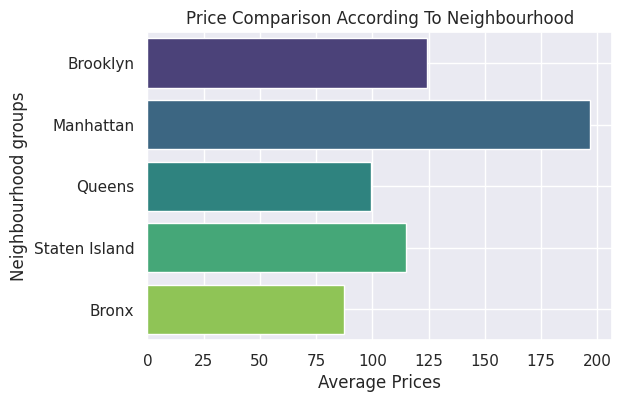

In [62]:
# Lets examine the relationship between the price of the aparts and the neighbourhood group
# lets create a horizontal bar chart to check the relationship

#avg_price_values = []

#for n in neighbour_hood_unique:
#  avg_price_values.append(df_airbnb[df_airbnb["neighbourhood_group"] == n]["price"].mean())

avg_price_values = [df_airbnb[df_airbnb["neighbourhood_group"] == n]["price"].mean() for n in neighbour_hood_unique]
# We're using list comprehension to append the average prices according to the neighbourhood group

sns.barplot(x=avg_price_values, y=neighbour_hood_unique, palette='viridis')
plt.xlabel('Average Prices')
plt.ylabel('Neighbourhood groups')
plt.title('Price Comparison According To Neighbourhood')
plt.grid(True)
plt.show()


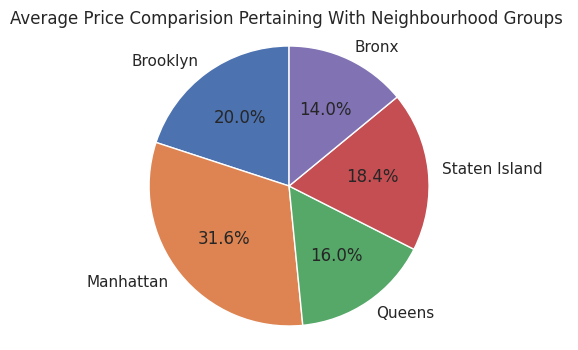

In [54]:
""" Here is an another way to investigate the distribution of avg prices
    according to the neighbourhood group
"""
plt.pie(avg_price_values, labels = neighbour_hood_unique, autopct = "%.1f%%",startangle=90)
plt.axis('equal')

plt.title('Average Price Comparision Pertaining With Neighbourhood Groups ')

plt.show()

# We can clearly say that the average prices in Manhattan is the highest.

In [56]:
room_types = df_airbnb["room_type"].unique()
room_types

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

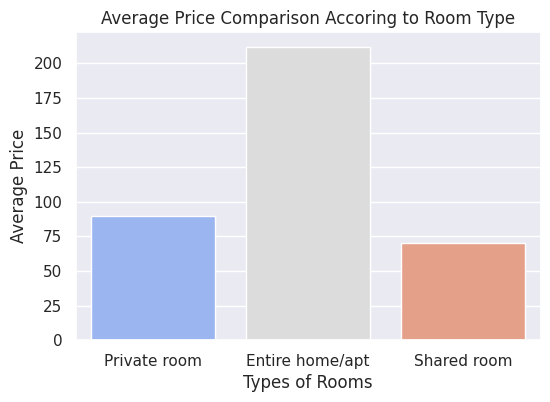

'\n  As expected, the average prices of entire home are much more expensive than \nothers.\n'

In [61]:
# lets investigate the relationship between the type of the rooms and average prices

#average_prices_room = []

#for r in room_types:
#  average_prices_room.append(df_airbnb[ df_airbnb["room_type"] == r]["price"].mean())

average_prices_room = [df_airbnb[ df_airbnb["room_type"] == r]["price"].mean() for r in room_types]

# lets draw a bar chart
sns.barplot(x=room_types, y=average_prices_room, palette = "coolwarm")

plt.xlabel('Types of Rooms')
plt.ylabel('Average Price')
plt.title('Average Price Comparison Accoring to Room Type')

plt.show()

"""
  As expected, the average prices of entire home are much more expensive than
others.
"""

In [66]:
# Now lets check out the distribution of room types to the neighbourhoods
room_type_count_neighbourghood = [df_airbnb[df_airbnb["neighbourhood_group"] == n]["room_type"].value_counts() for n in neighbour_hood_unique]
room_type_count_neighbourghood

[Private room       10123
 Entire home/apt     9553
 Shared room          413
 Name: room_type, dtype: int64,
 Entire home/apt    13190
 Private room        7973
 Shared room          480
 Name: room_type, dtype: int64,
 Private room       3370
 Entire home/apt    2096
 Shared room         198
 Name: room_type, dtype: int64,
 Private room       188
 Entire home/apt    176
 Shared room          9
 Name: room_type, dtype: int64,
 Private room       652
 Entire home/apt    378
 Shared room         59
 Name: room_type, dtype: int64]

In [71]:
# private roomun neighbourhooda göre dağılımı
#room_type_count_neighbourghood[0][0]
private_to_neighbourhood = [r[0] for r in room_type_count_neighbourghood]
entire_to_neighbourhood =  [r[1] for r in room_type_count_neighbourghood]
shared_to_neighbourhood =  [r[2] for r in room_type_count_neighbourghood]

Text(0.5, 1.0, 'The distribution of private flats according to neighbourhood')

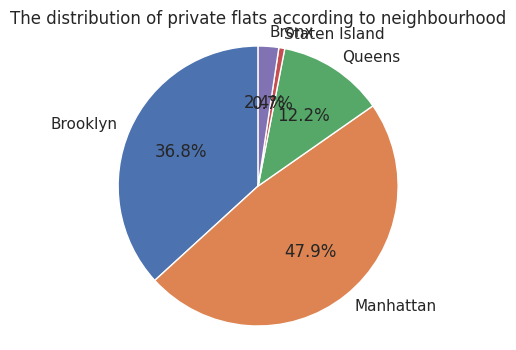

In [84]:
plt.pie(private_to_neighbourhood, labels=neighbour_hood_unique, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Daire şeklinde çizilmesini sağlar
plt.title('The distribution of private flats according to neighbourhood')

Text(0.5, 1.0, 'The distribution of entire apartments according to neighbourhood')

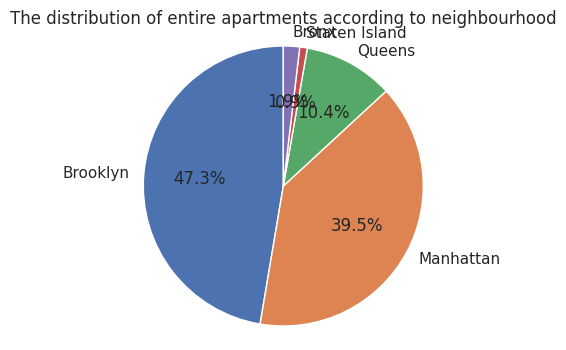

In [85]:
plt.pie(entire_to_neighbourhood, labels=neighbour_hood_unique, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Daire şeklinde çizilmesini sağlar
plt.title('The distribution of entire apartments according to neighbourhood')

Text(0.5, 1.0, 'The distribution of shared flats according to neighbourhood')

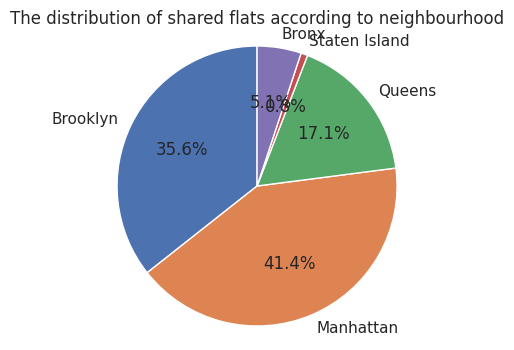

In [86]:
plt.pie(shared_to_neighbourhood, labels=neighbour_hood_unique, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Daire şeklinde çizilmesini sağlar
plt.title('The distribution of shared flats according to neighbourhood')

In [87]:
df_airbnb["availability_365"].unique()
# 100 günden fazla avaible olmanın price a artısı var mı şeklinde olabilir.

array([365, 355, 194,   0, 129, 220, 188,   6,  39, 314, 333,  46, 321,
        12,  21, 249, 347, 364, 304, 233,  85,  75, 311,  67, 255, 284,
       359, 269, 340,  22,  96, 345, 273, 309,  95, 215, 265, 192, 251,
       302, 140, 234, 257,  30, 301, 294, 320, 154, 263, 180, 231, 297,
       292, 191,  72, 362, 336, 116,  88, 224, 322, 324, 132, 295, 238,
       209, 328,  38,   7, 272,  26, 288, 317, 207, 185, 158,   9, 198,
       219, 342, 312, 243, 152, 137, 222, 346, 208, 279, 250, 164, 298,
       260, 107, 199, 299,  20, 318, 216, 245, 189, 307, 310, 213, 278,
        16, 178, 275, 163,  34, 280,   1, 170, 214, 248, 262, 339,  10,
       290, 230,  53, 126,   3,  37, 353, 177, 246, 225,  18, 343, 326,
       162, 240, 363, 247, 323, 125,  91, 286,  60,  58, 351, 201, 232,
       258, 341, 244, 329, 253, 348,   2,  56,  68, 360,  76,  15, 226,
       349,  11, 316, 281, 287,  14,  86, 261, 331,  51, 254, 103,  42,
       325,  35, 203,   5, 276, 102,  71,  78,   8, 182,  79,  4